# Import Libraries

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# Load Data Files

In [ ]:
directory = r'..\\Data Collection\\Framesize_variation\\Cleaned_data\\'

# List all files in the current directory
files = os.listdir(directory)

# Filter out the CSV files
csv_files = [file for file in files if file.endswith('.csv')]

# Read each CSV file into a DataFrame and store them in a dictionary
dataframes = {file: pd.read_csv(directory+file) for file in csv_files}



# All Dataset CSV Files

In [22]:
print(os.listdir(directory))

['cleaned_1024x768.csv', 'cleaned_1280x1024.csv', 'cleaned_1280x720.csv', 'cleaned_128x128.csv', 'cleaned_1600x1200.csv', 'cleaned_160x120.csv', 'cleaned_176x144.csv', 'cleaned_240x176.csv', 'cleaned_240x240.csv', 'cleaned_320x240.csv', 'cleaned_400x296.csv', 'cleaned_480x320.csv', 'cleaned_640x480.csv', 'cleaned_800x600.csv', 'cleaned_96x96.csv']


# Dataset Overview

In [30]:
print("Runtime Analysis for Each Resolution:")
print("-" * 60)
print(f"{'Resolution':<15} {'Duration (min)':<15} {'Total Samples':<15}")
print("-" * 60)

for file, df in dataframes.items():
    resolution = file.split('.')[0].split('_')[1]
    
    # Convert runtime to minutes
    df['Minutes'] = df['Runtime'] / (1000 * 60)
    
    # Calculate metrics
    max_duration = df['Minutes'].max()
    total_samples = len(df)

    
    print(f"{resolution:<15} {max_duration:>13.2f} {total_samples:>13d}")

print("-" * 60)

Runtime Analysis for Each Resolution:
------------------------------------------------------------
Resolution      Duration (min)  Total Samples  
------------------------------------------------------------
1024x768                16.13          2928
1280x1024               14.99          1850
1280x720                14.98          1425
128x128                 23.45         25346
1600x1200               14.99          1096
160x120                 15.00         43745
176x144                 13.72         41005
240x176                 15.00         40674
240x240                 48.02        102320
320x240                 14.90         38001
400x296                 15.00         30493
480x320                 14.97         17528
640x480                 14.79         12282
800x600                 15.00          7235
96x96                   15.00         43593
------------------------------------------------------------


# CSV File Overview

In [28]:
dataframes['cleaned_1024x768.csv']

,Runtime,Bytes Transmitted,Instant Frame Time (ms),Instant FPS,Avg Frame Time (ms),Avg FPS,Temperature (C),Framesize,Voltage,Seconds,Minutes
0,0,36339,60903,0.02,7025,0.14,63.89,1024x768,Unknown,0.000,0.000000
1,276,36576,276,3.62,6350,0.16,63.33,1024x768,Unknown,0.276,0.004600
2,68740,38219,17355,0.06,6598,0.15,65.00,1024x768,Unknown,68.740,1.145667
3,69140,40053,399,2.51,6612,0.15,65.00,1024x768,Unknown,69.140,1.152333
4,69422,39006,282,3.55,6618,0.15,65.00,1024x768,Unknown,69.422,1.157033
...,...,...,...,...,...,...,...,...,...,...,...
2923,966719,37597,226,4.42,291,3.44,73.33,1024x768,Unknown,966.719,16.111983
2924,967029,38249,309,3.24,292,3.42,73.89,1024x768,Unknown,967.029,16.117150
2925,967254,38925,224,4.46,291,3.44,74.44,1024x768,Unknown,967.254,16.120900
2926,967562,38099,307,3.26,292,3.42,73.89,1024x768,Unknown,967.562,16.126033


In [9]:
for file, df in dataframes.items():
    df['Runtime'] = df['Runtime'] - df['Runtime'].iloc[0]

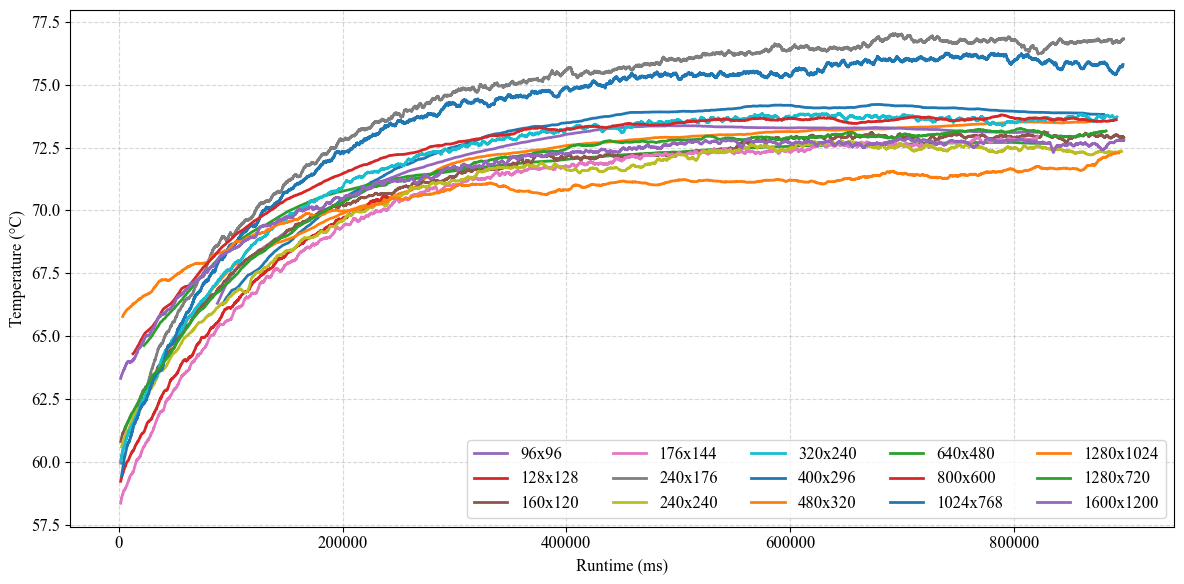

In [33]:
plt.figure(figsize=(12, 6))

window_size = 150  # Adjust smoothing intensity

# Create a list to store (resolution, line) pairs for sorting
lines = []

for file, df in dataframes.items():
    # Filter data where Runtime <= 0.8e6 and Runtime >= 0
    df_filtered = df[(df['Runtime'] <= 900000) & (df['Runtime'] >= 0)]
    
    # Apply rolling average smoothing
    temperature_smooth = df_filtered['Temperature (C)'].rolling(window=window_size, center=True).mean()
    
    # Plot and store the line object with its resolution
    line = plt.plot(df_filtered['Runtime'], temperature_smooth, 
                    label=file.split('.')[0].split('_')[1], linewidth=2)[0]
    lines.append((file.split('.')[0].split('_')[1], line))

# Sort lines by resolution (assuming format like "96x96")
sorted_lines = sorted(lines, key=lambda x: int(x[0].split('x')[0]))

plt.xlabel('Runtime (ms)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Create legend with sorted lines
plt.legend([line for _, line in sorted_lines],
          [label for label, _ in sorted_lines], ncol=len(df.columns)/2,
          loc='lower right')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save in high-quality formats
plt.savefig('temperature_runtime_plot.png', dpi=300, bbox_inches='tight')
plt.savefig('temperature_runtime_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Calculate statistics for each file
stats_dict = {}
for file, df in dataframes.items():
    voltage = file.split('.')[0]  # Extract voltage from filename
    stats_dict[voltage] = {
        'Mean FPS': df['Instant FPS'].mean(),
        'Mean Temperature': df['Temperature (C)'].mean(),
        'Mean File Size': df['Bytes Transmitted'].mean()
    }

# Convert to DataFrame and sort by voltage
stats_df = pd.DataFrame(stats_dict).round(2)
stats_df

,cleaned_1024x768,cleaned_1280x1024,cleaned_1280x720,cleaned_128x128,cleaned_1600x1200,cleaned_160x120,cleaned_176x144,cleaned_240x176,cleaned_240x240,cleaned_320x240,cleaned_400x296,cleaned_480x320,cleaned_640x480,cleaned_800x600,cleaned_96x96
Mean FPS,3.64,2.40,2.15,51.43,1.39,52.27,52.96,53.46,47.70,46.84,36.68,22.84,15.02,8.68,51.82
Mean Temperature,72.68,71.68,70.33,69.73,71.62,71.09,70.29,74.18,71.87,71.85,73.53,70.48,71.25,72.34,71.36
Mean File Size,40524.96,67638.45,46796.23,2005.48,108466.02,2924.12,2881.65,4929.59,5107.69,5947.81,10614.46,10015.03,15572.34,26978.11,2003.09


# Data Transmission Rate for each Resolution

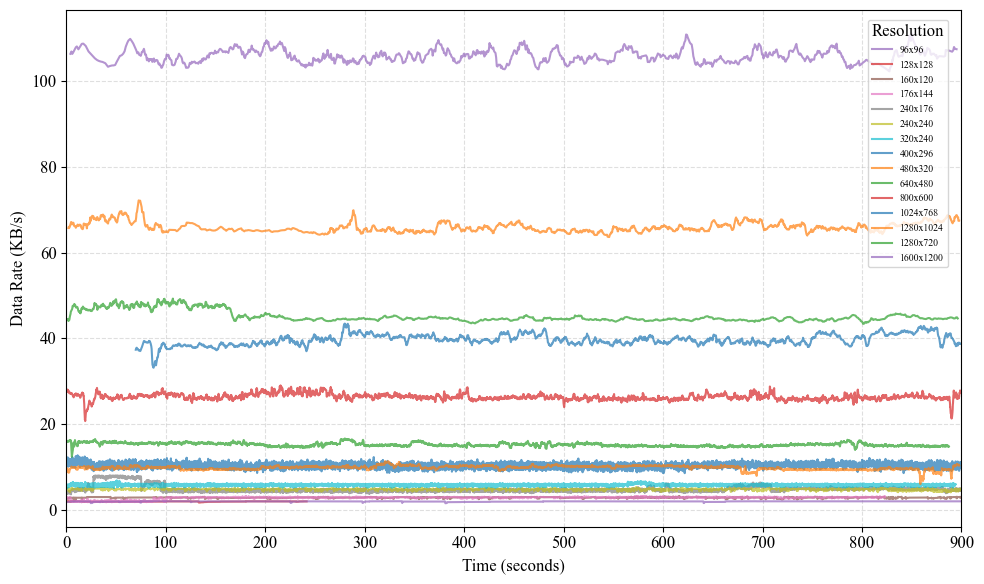


Average Transmission Rates (First 15 Minutes):
--------------------------------------------------
Resolution 96x96: 1.96 KB/s
Resolution 128x128: 1.94 KB/s
Resolution 160x120: 2.86 KB/s
Resolution 176x144: 2.81 KB/s
Resolution 240x176: 4.81 KB/s
Resolution 240x240: 4.77 KB/s
Resolution 320x240: 5.81 KB/s
Resolution 400x296: 10.37 KB/s
Resolution 480x320: 9.78 KB/s
Resolution 640x480: 15.21 KB/s
Resolution 800x600: 26.35 KB/s
Resolution 1024x768: 39.64 KB/s
Resolution 1280x1024: 66.05 KB/s
Resolution 1280x720: 45.70 KB/s
Resolution 1600x1200: 105.92 KB/s


In [18]:
# IEEE Standard Figure Size
plt.figure(figsize=(10, 6))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# Create a list to store (resolution, line) pairs for sorting
lines = []

# Plot bytes transmitted per second for each resolution
for file, df in dataframes.items():
    resolution = file.split('.')[0].split('_')[1]
    
    # Calculate bytes per second
    df['Seconds'] = df['Runtime'] / 1000  # Convert ms to seconds
    
    # Filter for first 15 minutes (900 seconds)
    df_filtered = df[df['Seconds'] <= 900]
    bytes_per_sec = df_filtered['Bytes Transmitted'] / 1024  # Convert to KB
    
    # Create smoothed line plot
    window_size = 10  # Adjust for desired smoothing
    bytes_smooth = bytes_per_sec.rolling(window=window_size, center=True).mean()
    
    # Plot and store the line object with its resolution
    line = plt.plot(df_filtered['Seconds'], bytes_smooth, 
                    linewidth=1.5, alpha=0.7)[0]
    lines.append((resolution, line))

# Sort lines by resolution size
sorted_lines = sorted(lines, key=lambda x: int(x[0].split('x')[0]))

plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Data Rate (KB/s)', fontsize=12)

# Create legend with sorted lines
plt.legend([line for _, line in sorted_lines],
          [label for label, _ in sorted_lines],
          title='Resolution', bbox_to_anchor=(0.89, 0.99), 
          loc='upper left', fontsize=7)

plt.grid(True, linestyle='--', alpha=0.4)
plt.xlim(0, 900)  # Set x-axis limit to 900 seconds (15 minutes)
plt.tight_layout()

# Save in publication formats
plt.savefig("transmission_res_rate_15min.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.savefig("transmission_res_rate_15min.png", dpi=300, bbox_inches="tight")
plt.show()

# Print average transmission rates for first 15 minutes in sorted order
print("\nAverage Transmission Rates (First 15 Minutes):")
print("-" * 50)
for resolution, _ in sorted_lines:
    filename = f"cleaned_{resolution.replace('x', 'x')}.csv"
    df_15min = dataframes[filename][dataframes[filename]['Seconds'] <= 900]
    avg_rate = (df_15min['Bytes Transmitted'] / 1024).mean()  # Average KB/s
    print(f"Resolution {resolution}: {avg_rate:.2f} KB/s")

# Total Data Transmitted (over first ~15 minutes)

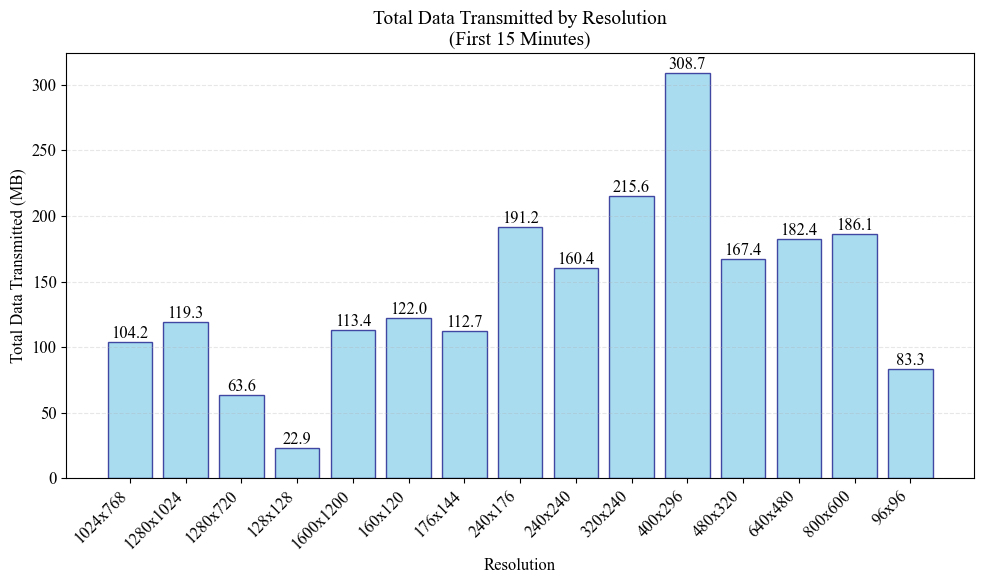


Total Data Transmitted (First 15 Minutes):
--------------------------------------------------
Resolution 1024x768: 104.24 MB
Resolution 1280x1024: 119.33 MB
Resolution 1280x720: 63.60 MB
Resolution 128x128: 22.87 MB
Resolution 1600x1200: 113.37 MB
Resolution 160x120: 121.99 MB
Resolution 176x144: 112.69 MB
Resolution 240x176: 191.22 MB
Resolution 240x240: 160.42 MB
Resolution 320x240: 215.55 MB
Resolution 400x296: 308.67 MB
Resolution 480x320: 167.41 MB
Resolution 640x480: 182.40 MB
Resolution 800x600: 186.14 MB
Resolution 96x96: 83.28 MB


In [ ]:

plt.figure(figsize=(10, 6))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# Calculate total bytes transmitted for each resolution
total_bytes = {}
for file, df in dataframes.items():
    resolution = file.split('.')[0].split('_')[1]
    # Filter for first 15 minutes (900 seconds)
    df_filtered = df[df['Runtime'] / 1000 <= 900]
    total_bytes[resolution] = df_filtered['Bytes Transmitted'].sum() / (1024 * 1024)  # Convert to MB

# Create bar plot
resolutions = list(total_bytes.keys())
values = list(total_bytes.values())

plt.bar(resolutions, values, color='skyblue', edgecolor='navy', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Resolution', fontsize=12)
plt.ylabel('Total Data Transmitted (MB)', fontsize=12)
plt.title('Total Data Transmitted by Resolution\n(First 15 Minutes)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Add value labels on top of bars
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()

# Save in publication formats
plt.savefig("total_data_by_resolution.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.savefig("total_data_by_resolution.png", dpi=300, bbox_inches="tight")
plt.show()

# Print the values
print("\nTotal Data Transmitted (First 15 Minutes):")
print("-" * 50)
for resolution, total in total_bytes.items():
    print(f"Resolution {resolution}: {total:.2f} MB")

# Average Framesize, Temperature and FPS (Over whole duration)

In [ ]:
# Load the dataset
file_path = directory+"ALL_data.xlsx"  
df = pd.read_excel(file_path)

# Extract columns related to FPS and Temperature
fps_cols = [col for col in df.columns if "Avg FPS" in col]
temp_cols = [col for col in df.columns if "Temperature" in col]

# Extract corresponding frame sizes and convert to common format
fps_framesizes = [col.replace("Avg FPS_", "").replace("_", "x") for col in fps_cols]
temp_framesizes = [col.replace("_Temperature (C)", "") for col in temp_cols]

# Identify matching frame sizes between FPS and Temperature
common_framesizes = list(set(fps_framesizes) & set(temp_framesizes))

# Create a DataFrame for storing the results
framesize_avg = pd.DataFrame({"Framesize": common_framesizes})

# Compute average FPS and temperature for each frame size
framesize_avg["Avg FPS"] = [
    df[f"Avg FPS_{size.replace('x', '_')}"].mean()
    if f"Avg FPS_{size.replace('x', '_')}" in df.columns
    else None
    for size in common_framesizes
]

framesize_avg["Avg Temperature (C)"] = [
    df[f"{size}_Temperature (C)"].mean()
    if f"{size}_Temperature (C)" in df.columns
    else None
    for size in common_framesizes
]

# Save to CSV 
framesize_avg.to_csv("Framesize_Average_Temperature_FPS.csv", index=False)

# Display the result
print("Framesize Average Temperature & FPS")
print(framesize_avg)

Framesize Average Temperature & FPS
    Framesize    Avg FPS  Avg Temperature (C)
0     176x144  52.447631            70.293784
1    1280x720   1.987418            70.327074
2     640x480  14.187377            71.252068
3     320x240  44.442962            71.850548
4     160x120  51.301212            71.089399
5     240x240  43.206979            71.701248
6   1280x1024   2.268600            71.683400
7   1600x1200   1.294151            71.623805
8       96x96  51.171211            71.356439
9     240x176  48.487295            74.176538
10    128x128  52.586722            69.733580
11    400x296  35.262333            73.528556
12   1024x768   3.372189            72.683053
13    800x600   8.246430            72.335545
14    480x320  20.866473            70.484036


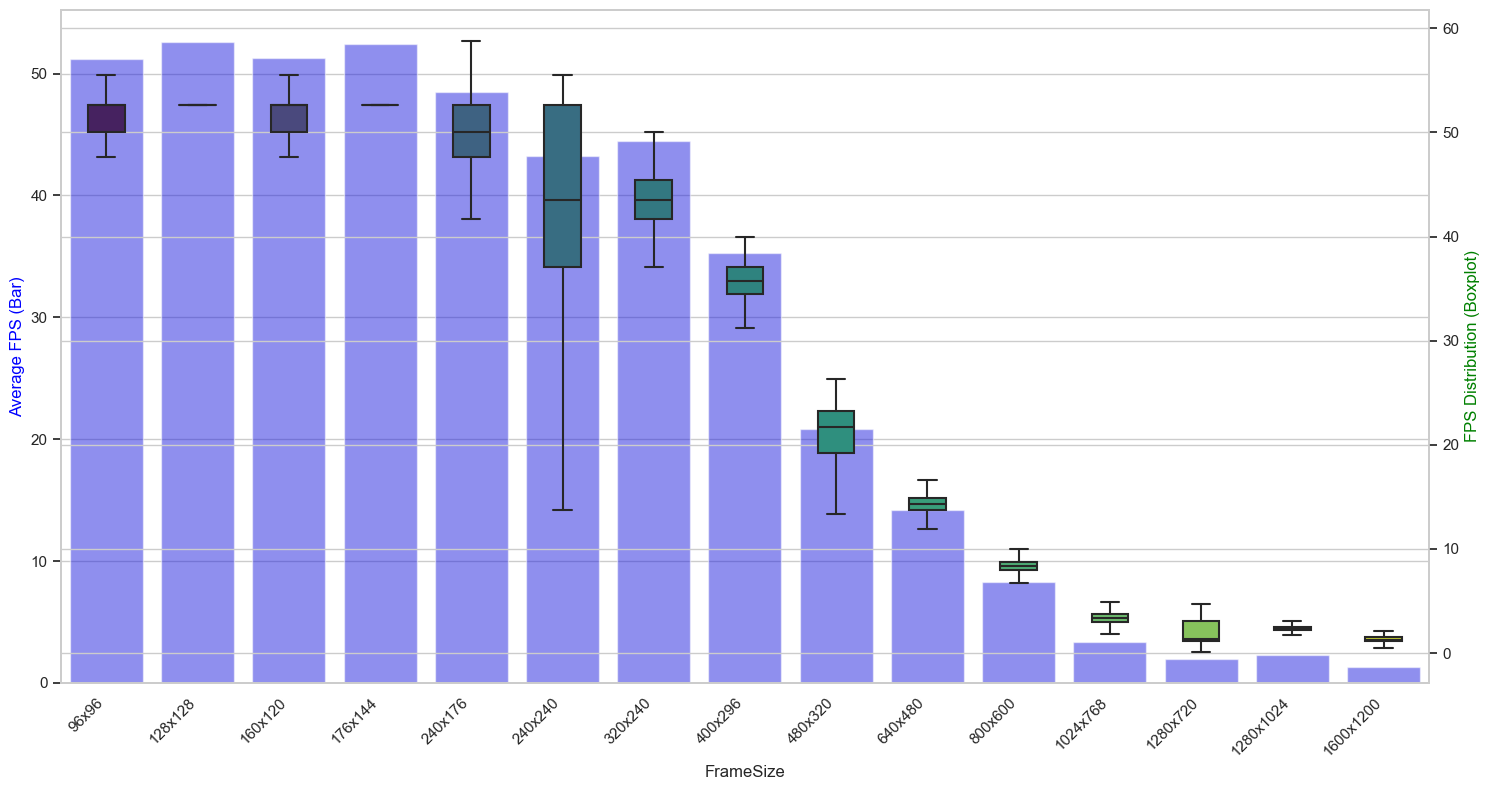

In [ ]:

sns.set_theme(context="notebook", style="whitegrid")  # "notebook" context typically has normal text size
plt.rcParams["font.size"] = 10  

# Load your dataset
file_path = directory+"ALL_avgFPS.xlsx"  # Update with the actual file path
df = pd.read_excel(file_path)

# Extract and process frame sizes from column names
fps_columns = [col for col in df.columns if 'Avg FPS_' in col]
frame_sizes = [col.replace('Avg FPS_', '').replace('_', 'x') for col in fps_columns]

# Create sorting key based on resolution
def get_resolution_key(frame_size):
    w, h = map(int, frame_size.split('x'))
    return w * h  # Sort by total pixels (width × height)

# Sort frame sizes by resolution
sorted_frame_sizes = sorted(frame_sizes, key=get_resolution_key)

# Create sorted column names for DataFrame
sorted_columns = [f'Avg FPS_{fs.replace("x", "_")}' for fs in sorted_frame_sizes]

# Melt DataFrame for seaborn plotting
melted_df = df[sorted_columns].melt(var_name='FrameSize', value_name='FPS')
melted_df['FrameSize'] = (
    melted_df['FrameSize']
    .str.replace('Avg FPS_', '')
    .str.replace('_', 'x')
)

# Set up plot parameters
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Frame Size (Width × Height)')
plt.ylabel('FPS')

# Create combined plot with both bar chart and boxplot
ax1 = plt.gca()
ax2 = ax1.twinx()

# Boxplot (FPS Distribution)
sns.boxplot(
    x='FrameSize', y='FPS', data=melted_df, ax=ax2, 
    whis=1.5, width=0.4, showfliers=False,
    palette='viridis', order=sorted_frame_sizes
)

# Bar chart (Average FPS)
sns.barplot(
    x='FrameSize', y='FPS', data=melted_df, ax=ax1,
    estimator='mean', errorbar=None, 
    color='blue', order=sorted_frame_sizes, alpha=0.5
)

# Add legend and labels
ax1.set_ylabel('Average FPS (Bar)', color='blue')
ax2.set_ylabel('FPS Distribution (Boxplot)', color='green')

plt.tight_layout()
plt.savefig("FPS_Distribution_Average.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()


In [51]:
# Calculate and print number of transmissions for each resolution
print("\nNumber of Transmissions by Resolution (First 15 Minutes):")
print("-" * 60)
print(f"{'Resolution':<15} {'Total Transmissions':<20} {'Transmissions/min':<20}")
print("-" * 60)

for file, df in dataframes.items():
    resolution = file.split('.')[0].split('_')[1]
    # Filter for first 15 minutes
    df_filtered = df[df['Runtime'] / 1000 <= 900]
    total_transmissions = len(df_filtered)
    transmissions_per_min = total_transmissions / 15  # 15 minutes period
    
    print(f"{resolution:<15} {total_transmissions:<20d} {transmissions_per_min:>18.2f}")


Number of Transmissions by Resolution (First 15 Minutes):
------------------------------------------------------------
Resolution      Total Transmissions  Transmissions/min   
------------------------------------------------------------
1024x768        2693                             179.53
1280x1024       1850                             123.33
1280x720        1425                              95.00
128x128         12085                            805.67
1600x1200       1096                              73.07
160x120         43745                           2916.33
176x144         41005                           2733.67
240x176         40674                           2711.60
240x240         34455                           2297.00
320x240         38001                           2533.40
400x296         30493                           2032.87
480x320         17528                           1168.53
640x480         12282                            818.80
800x600         7235             